# Importamos paquetes

sdf_helper para leer los datos, Pandas para procesarlos, Numpy para trabajar con los arrays, Matplotlib para crear las gráficas

In [2]:
import sdf_helper as sh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import functools

# Importamos los datos

Importamos los 100 outputs producidos por la simulación, que se corresponden a cada step de $5\,\mathrm{fs}$

In [3]:
data = sh.getdata(0, '/home/juan/Documentos/GitHub/epoch/epoch2d/output/dumps/aras_comparison')
sh.list_variables(data)

Reading file /home/juan/Documentos/GitHub/epoch/epoch2d/output/dumps/aras_comparison/0000.sdf
t() = time
ex(3072, 768) = ex
x(3073, 769) = grid
y(3073, 769) = grid
xc(3072, 768) = grid_mid
yc(3072, 768) = grid_mid
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [1, 1]
Electric_Field_Ex <class 'sdf.BlockPlainVariable'> [3072,  768]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [2, 2]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [1, 1]
Grid_Grid <class 'sdf.BlockPlainMesh'> [3073,  769]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [3072,  768]
Wall_time <class 'sdf.BlockConstant'> [1]


Reading file /home/juan/Documentos/GitHub/epoch/epoch2d/output/dumps/aras_comparison/0010.sdf
t() = time
ex(3072, 768) = ex
x(3073, 769) = grid
y(3073, 769) = grid
xc(3072, 768) = grid_mid
yc(3072, 768) = grid_mid


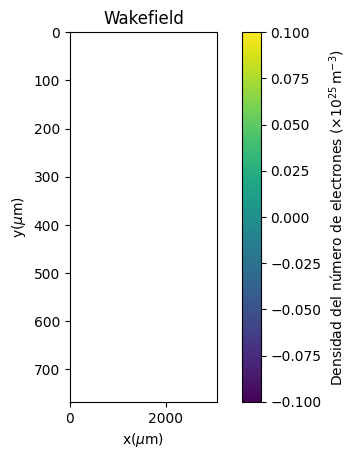

In [7]:
data_375fs = sh.getdata(1, '/home/juan/Documentos/GitHub/epoch/epoch2d/output/dumps/aras_comparison')
densidad_numero_e = data_375fs.Electric_Field_Ex
raw = densidad_numero_e.data

fig, ax = plt.subplots()
ax.set_xlabel(r'x($\mu$m)')
ax.set_ylabel(r'y($\mu$m)')
ax.set_title('Wakefield')

im = ax.imshow(raw.T, interpolation='none', aspect=3000/300)

cbar = fig.colorbar(im)
cbar.set_label(r'Densidad del número de electrones ($\times10^{25}\,\mathrm{m}^{-3}$)')

plt.show()

# Animación

Vamos a intentar hacer una animación de la evolución de la densidad de electrones

In [ ]:
data_list = [sh.getdata(i, 'output').Derived_Number_Density_electron.data for i in range(40)]

Reading file ./0000.sdf
t() = time
ex(3750, 300) = ex
ey(3750, 300) = ey
x(3751, 301) = grid
y(3751, 301) = grid
xc(3750, 300) = grid_mid
yc(3750, 300) = grid_mid
Reading file ./0001.sdf
t() = time
ex(3750, 300) = ex
ey(3750, 300) = ey
x(3751, 301) = grid
y(3751, 301) = grid
xc(3750, 300) = grid_mid
yc(3750, 300) = grid_mid
Reading file ./0002.sdf
t() = time
ex(3750, 300) = ex
ey(3750, 300) = ey
x(3751, 301) = grid
y(3751, 301) = grid
xc(3750, 300) = grid_mid
yc(3750, 300) = grid_mid
Reading file ./0003.sdf
t() = time
ex(3750, 300) = ex
ey(3750, 300) = ey
x(3751, 301) = grid
y(3751, 301) = grid
xc(3750, 300) = grid_mid
yc(3750, 300) = grid_mid
Reading file ./0004.sdf
t() = time
ex(3750, 300) = ex
ey(3750, 300) = ey
x(3751, 301) = grid
y(3751, 301) = grid
xc(3750, 300) = grid_mid
yc(3750, 300) = grid_mid
Reading file ./0005.sdf
t() = time
ex(3750, 300) = ex
ey(3750, 300) = ey
x(3751, 301) = grid
y(3751, 301) = grid
xc(3750, 300) = grid_mid
yc(3750, 300) = grid_mid
Reading file ./0006.sd

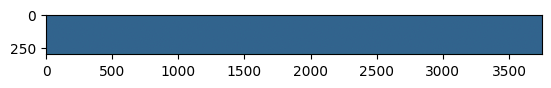

In [ ]:
fig, ax = plt.subplots()

ims = []
for i in range(len(data_list)):
    im = ax.imshow(data_list[i].T, animated=True)
    if i == 0:
        ax.imshow(data_list[i].T)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=False, repeat_delay=1000)
ani.save("number_density.gif")

# Campo eléctrico longitudinal

Plot de la evolución del campo eléctrico longitudinal a lo largo del eje x

In [ ]:
electric_fields = [sh.getdata(i, '/home/juan/Documentos/GitHub/epoch/epoch2d/output/dumps/density_scan/dens_1.0e17').Electric_Field_Ex.data for i in range(40)]

In [32]:
print(electric_fields[0][:][:].shape)

(3750, 300)


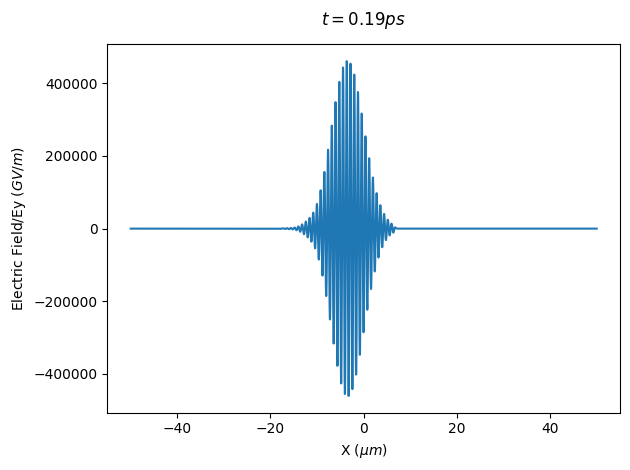

In [ ]:
sh.plot1d(sh.getdata(19, 'output').Electric_Field_Ey)

Reading file ./0020.sdf
t() = time
ex(3750, 300) = ex
ey(3750, 300) = ey
x(3751, 301) = grid
y(3751, 301) = grid
xc(3750, 300) = grid_mid
yc(3750, 300) = grid_mid


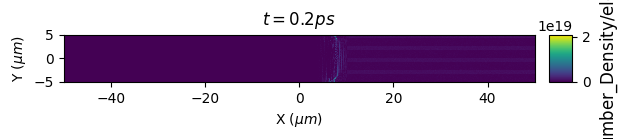

In [ ]:
sh.plot_auto(sh.getdata(20, 'output').Derived_Number_Density_electron)